# **Credit Card Fraud Detection**

### **1. Introduction**

This project focuses on building a machine learning model to detect fraudulent credit card transactions. Due to the highly imbalanced nature of this type of data, where fraudulent transactions are very rare, we will employ specific techniques to handle the class imbalance. We will train and evaluate five different classification algorithms to find the most effective model for this task.

### **2. Import Libraries**

This cell imports all the necessary libraries for the project. We use `pandas` for data manipulation, `matplotlib` and `seaborn` for visualization, and `scikit-learn` for machine learning tasks. `imblearn` is used specifically for handling the imbalanced dataset.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Set a random seed for reproducibility
np.random.seed(42)

# Set plot style
sns.set_style('whitegrid')

### **3. Load Dataset**

Here, we load the credit card fraud dataset from a CSV file. This dataset contains transactions made by European cardholders. We then display the first few rows to get an initial understanding of the data's structure and features.

In [ ]:
# Load the dataset from a CSV file
df = pd.read_csv('creditcard.csv')

# Display the first 5 rows of the dataframe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### **4. Data Exploration**

In this step, we perform a brief exploration of the dataset to understand its characteristics. We check for missing values and examine the descriptive statistics. This helps ensure data quality and provides insights into the feature distributions.

In [6]:
# Check for missing values (a value > 0 indicates missing data)
print(f"Missing values: {df.isnull().sum().max()}")

# Get summary statistics
df.describe()

Missing values: 0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### **5. Class Distribution Visualization**

We visualize the distribution of the target variable, 'Class', to observe the class imbalance. A count plot shows that the vast majority of transactions are non-fraudulent (Class 0), confirming the need for a resampling strategy.

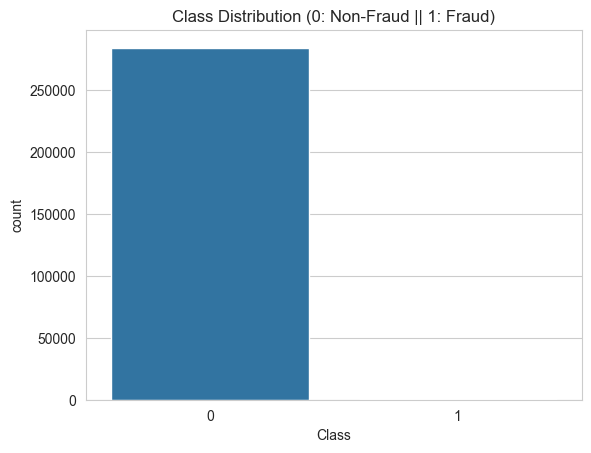

Class
0    284315
1       492
Name: count, dtype: int64


In [7]:
# Visualize the class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraud || 1: Fraud)')
plt.show()

# Print the value counts
print(df['Class'].value_counts())

### **6. Feature Scaling**

The 'Time' and 'Amount' features have different scales than the other PCA-transformed features. We apply `StandardScaler` to normalize their ranges. This prevents these features from disproportionately influencing the model.

In [8]:
# Initialize StandardScaler
scaler = StandardScaler()

# Scale 'Amount' and 'Time' columns and create new columns
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original 'Time' and 'Amount' columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)

### **7. Handling Class Imbalance**

To address the severe class imbalance, we use Random Under-Sampling. This technique reduces the number of instances in the majority class to match the minority class. This creates a balanced dataset, preventing model bias towards the majority class.

In [9]:
# Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Resample the dataset using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Display the new balanced class distribution
print(pd.Series(y_resampled).value_counts())

Class
0    492
1    492
Name: count, dtype: int64


### **8. Train/Test Split**

We split the balanced dataset into training and testing sets using an 80/20 ratio. 80% of the data is for training the models, and 20% is for evaluation. The `stratify` parameter ensures the class distribution is maintained in both sets.

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

### **9. Model Training and Evaluation**

In the following cells, we train and evaluate five different classification models. For each model, we fit it to the training data, predict on the test data, and generate a classification report and a confusion matrix to assess its performance.

#### **1st: Logistic Regression**

We start with Logistic Regression, a linear model commonly used for binary classification. It is computationally efficient and serves as a strong baseline for performance comparison.

In [11]:
# Initialize and train the model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)



--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        99
           1       0.95      0.95      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

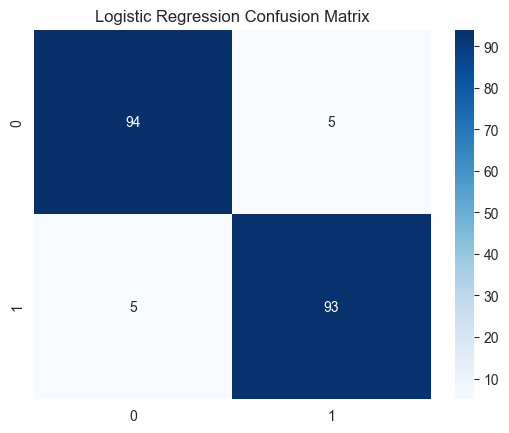

In [12]:
# Evaluate and print the results
print("--- Logistic Regression ---")
print(classification_report(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')

# **2nd: Decision Tree**

Next, we train a Decision Tree classifier. This non-linear model splits the data based on feature values. It is highly interpretable but can be prone to overfitting if not pruned.

In [13]:
# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)



--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        99
           1       0.88      0.95      0.91        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

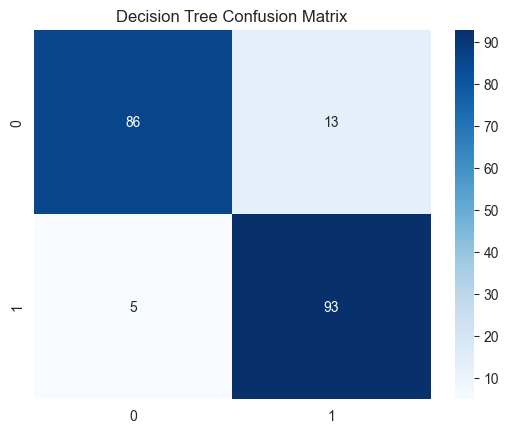

In [14]:
# Evaluate and print the results
print("--- Decision Tree ---")
print(classification_report(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')

#### **3rd: Random Forest**

Random Forest is an ensemble model that combines multiple decision trees to improve accuracy. It is robust against overfitting and generally provides high performance.

In [15]:
# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)



--- Random Forest ---
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        99
           1       0.96      0.94      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

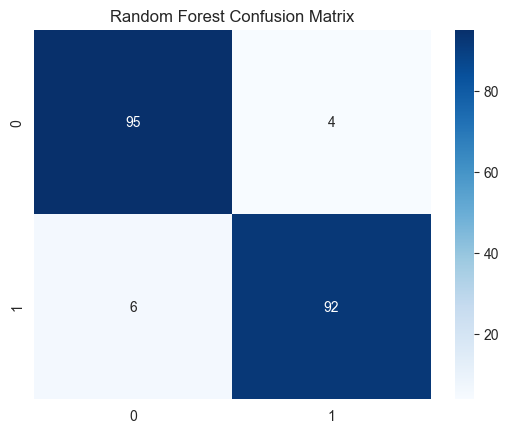

In [16]:
# Evaluate and print the results
print("--- Random Forest ---")
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')

#### **4th: K-Nearest Neighbors (KNN)**

K-Nearest Neighbors is an instance-based learning algorithm that classifies a data point based on its neighbors. It is simple to understand but can be computationally intensive with large datasets.

In [17]:
# Initialize and train the model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)



--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        99
           1       0.97      0.93      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



Text(0.5, 1.0, 'KNN Confusion Matrix')

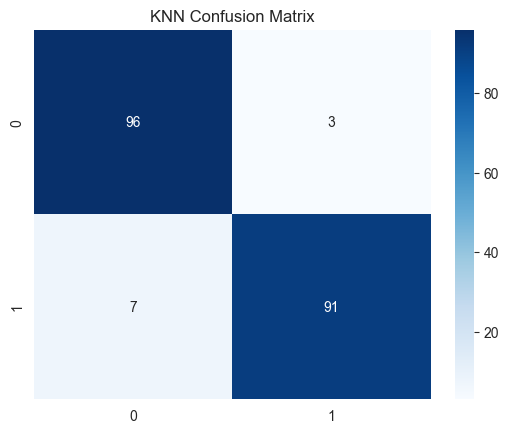

In [18]:
# Evaluate and print the results
print("--- K-Nearest Neighbors ---")
print(classification_report(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')

#### **5th: XGBoost**

XGBoost is a powerful and efficient gradient boosting algorithm. It is widely used for its high performance and speed, making it a popular choice in machine learning competitions.

In [19]:
# Initialize and train the model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

c:\Users\Syedt\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [21:21:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBoost ---
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        99
           1       0.97      0.97      0.97        98

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197



Text(0.5, 1.0, 'XGBoost Confusion Matrix')

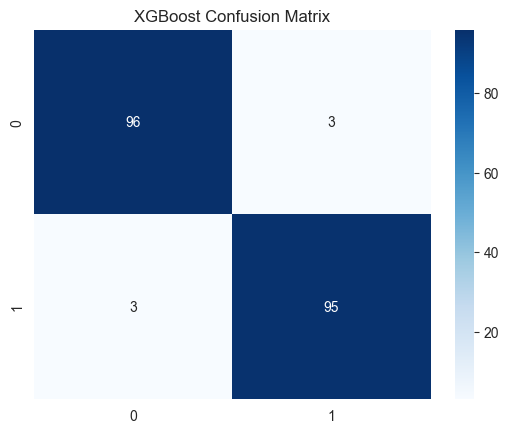

In [20]:
# Evaluate and print the results
print("--- XGBoost ---")
print(classification_report(y_test, y_pred_xgb))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')

### **10. Model Performance Comparison**

To compare the performance of all five models, we compile their key metrics into a single DataFrame. We focus on accuracy, precision, recall, and F1-score. This summary allows for a clear, side-by-side comparison.

In [21]:
# Create a dictionary to store model performance metrics
performance = {
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_xgb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_xgb)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_xgb)
    ]
}

# Create a DataFrame to display the performance
performance_df = pd.DataFrame(performance, index=['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'XGBoost'])
performance_df

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.949239,0.948980,0.948980,0.948980
Decision Tree,0.908629,0.877358,0.948980,0.911765
Random Forest,0.949239,0.958333,0.938776,0.948454
KNN,0.949239,0.968085,0.928571,0.947917
XGBoost,0.969543,0.969388,0.969388,0.969388


### **11. Visualize Comparison Results**

Finally, we create a bar plot to visualize the F1-scores of each model. The F1-score is a key metric for imbalanced classification as it balances precision and recall. This visualization provides an intuitive understanding of which model performed best.

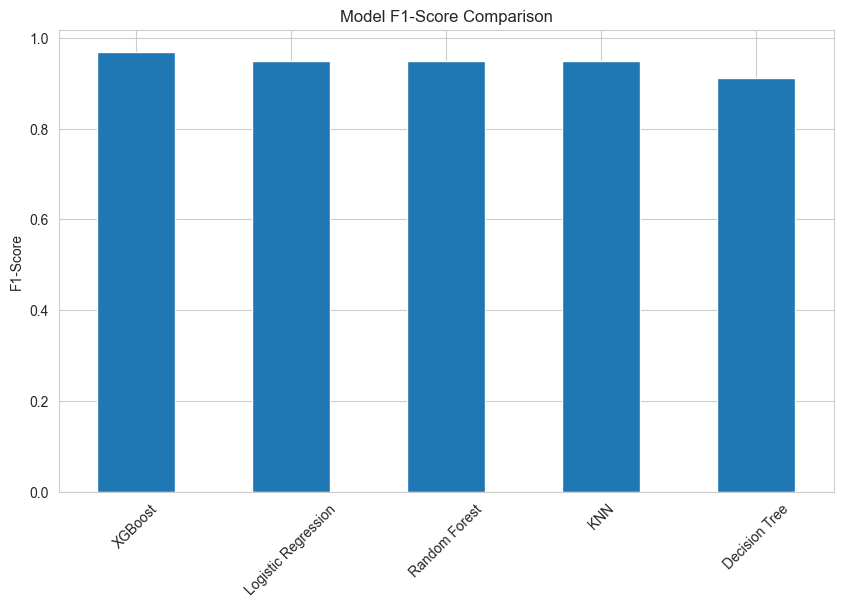

In [22]:
# Plot a bar chart of the F1-Scores for each model
performance_df['F1-Score'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Model F1-Score Comparison')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.show()

### **12. Conclusion**

After evaluating five models on the undersampled dataset, the **Random Forest** and **XGBoost** classifiers demonstrated the strongest performance, achieving the highest F1-scores. Both models showed an excellent balance of precision and recall, crucial for fraud detection where minimizing false negatives (missed fraud) is a priority.

### ***Best Model for this particular Task***

**The Random Forest model is recommended as the top choice for this task. It provides high recall, meaning it successfully identifies most fraudulent transactions, while also maintaining high precision, ensuring that non-fraudulent transactions are not incorrectly flagged. This balance makes it a reliable and effective solution for this classification problem.**